#Case Study: Sentiment Analysis

With the explosion of user-generated content on platforms like Twitter, analyzing public sentiment has become a powerful tool for businesses, policymakers, and researchers. This case study aims to build and compare machine learning and deep learning models for tweet sentiment classification.

We classify tweets into positive or negative sentiments by processing raw tweet text data and applying both traditional models (like Logistic Regression and SVM) and a neural network using LSTM (Long Short-Term Memory).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import nltk
warnings.filterwarnings('ignore')

In [2]:
pip install wordcloud

In [21]:
#download nltk resources
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
df = pd.read_csv("/content/tweets.csv")

In [5]:
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [6]:
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [7]:
df.size

23760

In [8]:
df.isnull().sum()

,0
id,0
label,0
tweet,0


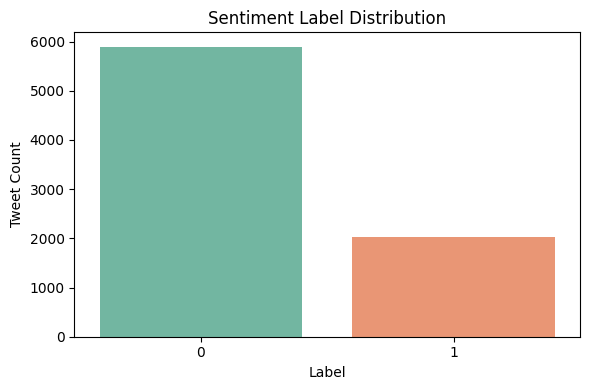

In [9]:
#Visualize Sentiment Label Distribution

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='Set2')
plt.title('Sentiment Label Distribution')
plt.xlabel('Label')
plt.ylabel('Tweet Count')
plt.tight_layout()
plt.show()

In [16]:
#common hashtags

import re
from collections import Counter


def extract_hashtags(text):
  hashtags = re.findall(r"#(\w+)", text)
  return [tag.lower() for tag in hashtags]

df['hashtags'] = df['tweet'].apply(extract_hashtags)

all_hashtags = [tag for tags in df['hashtags'] for tag in tags]

common_hashtags = Counter(all_hashtags)
top_hashtags = common_hashtags.most_common(20)

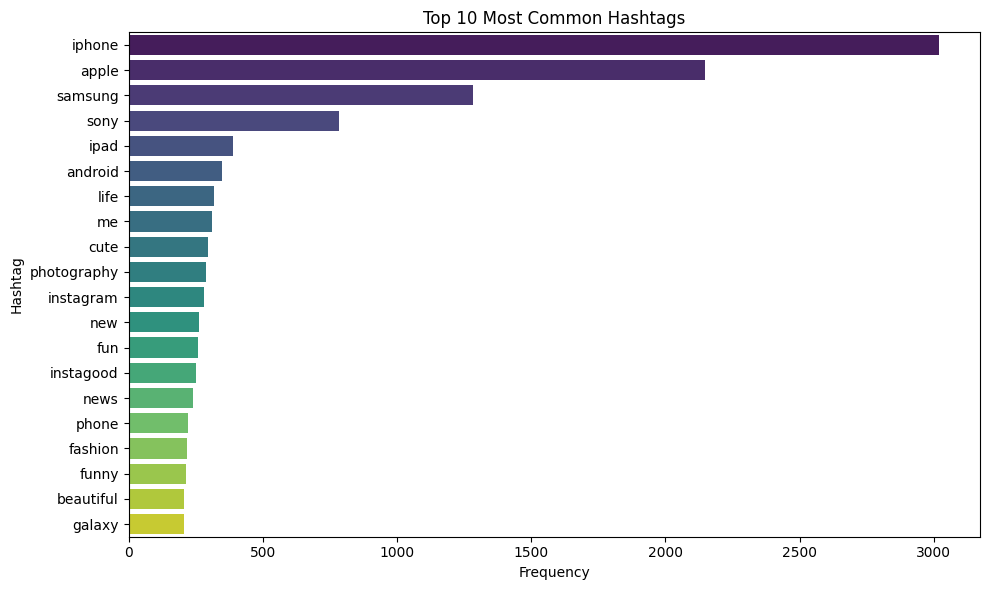

In [17]:
hashtags_df = pd.DataFrame(top_hashtags, columns=['Hashtag', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Hashtag', data=hashtags_df, palette='viridis')
plt.title('Top 10 Most Common Hashtags')
plt.xlabel('Frequency')
plt.ylabel('Hashtag')
plt.tight_layout()
plt.show()

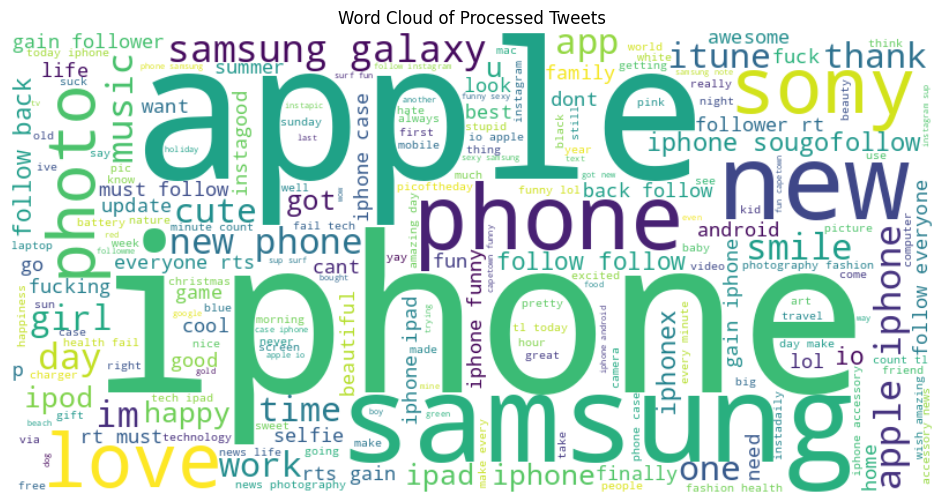

In [37]:
#word cloud of common words

from wordcloud import WordCloud

# Join all tweets into one string
all_words = ' '.join(df['processed_tweet'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_words)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Processed Tweets")
plt.show()


#Text Preprocessing

Text data from social media, like tweets, is often noisy—filled with hashtags, mentions, URLs, emojis, and inconsistent language use. Text preprocessing is the essential first step in any NLP (Natural Language Processing) pipeline. It prepares raw text into a clean and structured format that can be used for feature extraction and model training.

#### Why Preprocessing Is Important:

  - Reduces noise (e.g., punctuation, URLs)

  - Normalizes text (e.g., lowercasing, lemmatization)

  - Improves model accuracy and generalization

  - Reduces feature space (fewer unique tokens)


Tokenization

 - What it does: Splits a sentence into individual words (tokens).
Why: Enables word-level processing like stopword removal and lemmatization.

Stopword Removal

 - What are Stopwords?

  Stopwords are common words like:

  "the", "is", "in", "and", "it", "to", etc.

 - Why Remove Them?

  They occur frequently in text but carry little useful meaning for tasks like sentiment or topic classification.

  Removing them reduces noise and shrinks the vocabulary without hurting performance.

Lemmatization
- What is Lemmatization?

  Lemmatization is the process of converting words to their dictionary base form (lemma).
  Unlike stemming, lemmatization uses context and grammar to produce valid words.

-  Examples:

  "running", "ran", "runs" → "run"

  "better" → "good"

- Why Use Lemmatization?

  It helps group related words, reducing feature sparsity.

  Unlike stemming (which may return "runn"), lemmatization returns meaningful base words.
  

note: Stemming is a text normalization technique in Natural Language Processing (NLP) that reduces a word to its base or root form by removing suffixes (like -ing, -ed, -ly, -s, etc.).

However, unlike lemmatization, stemming does not ensure the resulting word is a valid dictionary word. It simply chops off word endings based on a set of rules.





In [64]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
#nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # 1. Lowercasing
    text = text.lower()

    # 2. Removing URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # 3. Removing User Mentions (@usernames)
    text = re.sub(r"@\w+", '', text)

    # 4. Removing Hashtags (keeping the word, removing only the # symbol)
    # If you want to remove the whole hashtag: re.sub(r"#\w+", '', text)
    text = re.sub(r"#", '', text)

    # 5. Removing Punctuation (keeping alphanumeric and spaces)
    text = re.sub(r'[^\w\s]', '', text)

    # 6. Removing Numbers (if not relevant)
    text = re.sub(r'\d+', '', text)

    # 7. Tokenization
    tokens = word_tokenize(text)

    # 8. Removing Stop Words
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    #applying lemmatizing
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    # Join tokens back into a string or keep as a list for further steps
    return " ".join(lemmatized_tokens)


In [63]:
df['processed_tweet'] = df['tweet'].apply(preprocess_text)

In [23]:
df.head()

,id,label,tweet,hashtags,processed_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,"[fingerprint, pregnancy, android, apps, beauti...",fingerprint pregnancy test android apps beauti...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,"[yay, sony, xperia, s, sonyexperias]",finally transparant silicon case thanks uncle ...
2,3,0,We love this! Would you go? #talk #makememorie...,"[talk, makememories, unplug, relax, iphone, sm...",love would go talk makememories unplug relax i...
3,4,0,I'm wired I know I'm George I was made that wa...,"[iphone, cute, daventry, home]",im wired know im george made way iphone cute d...
4,5,1,What amazing service! Apple won't even talk to...,[],amazing service apple wont even talk question ...


In [ ]:
#tfidf_vectorizer = TfidfVectorizer(max_features=5000)
#X_tfidf = tfidf_vectorizer.fit_transform(df['tweet'])

#print("shape of tfdifVectorizer feature", X_tfidf.shape)
#print("faetures (words) : ", tfidf_vectorizer.get_feature_names_out()[:10])

## Splitting the data

In [25]:
from sklearn.model_selection import train_test_split

X = df['processed_tweet']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [26]:
X_train.head()

,processed_tweet
4252,cool car wash idea theisland bankholidaymonday...
4428,photo th birthday sony walkman nobody beat wiz
7374,ipads biggest pile fucking planet want throw f...
1410,yearbook hmmmmm instagram instagood together f...
7896,pissed macbook crash apple company nothing app...


## Feature engineering

Before feeding data into ML models, we convert text into numerical features.

Techniques Used:
TF-IDF (Term Frequency-Inverse Document Frequency)
Captures word importance by down-weighting common words and emphasizing rare ones.

In [32]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (LinearSVC)": LinearSVC(),
    "Naive Bayes": MultinomialNB()
}

for name, clf in models.items():
    print(f"\n=== {name} ===")
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))



=== Logistic Regression ===
Accuracy: 0.8750
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1152
           1       0.85      0.65      0.74       432

    accuracy                           0.88      1584
   macro avg       0.87      0.81      0.83      1584
weighted avg       0.87      0.88      0.87      1584


=== SVM (LinearSVC) ===
Accuracy: 0.8845
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1152
           1       0.82      0.74      0.78       432

    accuracy                           0.88      1584
   macro avg       0.86      0.84      0.85      1584
weighted avg       0.88      0.88      0.88      1584


=== Naive Bayes ===
Accuracy: 0.8763
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1152
           1       0.85      0.67      0.75       432

    accuracy                           0.88      1584
  

### Recurrent Neural Network (RNN)

An RNN is a type of neural network designed to process sequential data, such as:

Sentences

Time series

Speech/audio

Stock prices

Unlike traditional neural networks, which treat all inputs independently, RNNs remember past information and use it to influence the current output — like how you understand the meaning of a sentence word by word.

Limitations of RNN

  - Vanishing gradients: The model forgets early words in long sentences.

  - Short-term memory: Struggles with long-term dependencies.

  - Training is slow and unstable for long sequences.


Long Short-Term Memory (LSTM)

An LSTM is a special type of RNN that can learn long-term dependencies more effectively. It solves the vanishing gradient problem and is better at remembering context over longer sequences.

It was designed to:

- Remember important information for a long time

- Forget irrelevant information



In [65]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder

In [40]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['processed_tweet'])

sequences = tokenizer.texts_to_sequences(df['processed_tweet'])
padded = pad_sequences(sequences, maxlen=50, padding='post')

# --- Encode labels ---
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])

Sure! Here's a **short explanation** of each part of your code:

---

###  `Tokenizer(num_words=10000, oov_token="<OOV>")`

* Limits vocabulary to the top 10,000 words.
* Uses `<OOV>` for out-of-vocabulary words.

###  `tokenizer.fit_on_texts(df['processed_tweet'])`

* Learns word-to-index mapping from the tweets.

###  `sequences = tokenizer.texts_to_sequences(...)`

* Converts each tweet into a list of word indices.

###  `padded = pad_sequences(..., maxlen=50)`

* Pads or truncates each sequence to exactly 50 tokens (adds zeros at the end).

###  `LabelEncoder().fit_transform(df['label'])`

* Converts text labels (like "positive", "negative") into numbers (e.g., 1 and 0).

---

These steps prepare text and labels for feeding into a deep learning model like LSTM.


In [58]:
# --- Train/test split ---
X_train, X_temp, y_train, y_temp = train_test_split(padded, y, test_size=0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# --- Build LSTM model ---
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=50),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid') # Changed to 1 unit with sigmoid for binary classification
])


---

##  **Model Architecture Explained**

This is a **Sequential LSTM model** designed for **binary sentiment classification** on tweet data.

---

###  `Embedding(input_dim=10000, output_dim=64, input_length=50)`

* Converts each word (integer index) into a **dense 64-dimensional vector**.
* `input_dim=10000`: Vocabulary size (top 10,000 words).
* `output_dim=64`: Size of each word vector.
* `input_length=50`: Each tweet has 50 tokens (padded).

---

### 🔁 `LSTM(64, dropout=0.2, recurrent_dropout=0.2)`

* **LSTM layer** with 64 memory units.
* `dropout=0.2`: Randomly drops 20% of input connections.
* `recurrent_dropout=0.2`: Drops 20% of recurrent connections (inside LSTM loops).


---

### 🔲 `Dense(32, activation='relu')`

* Fully connected layer with 32 neurons.
* `relu` activation helps the network learn non-linear patterns.


---

### 🔻 `Dropout(0.3)`

* Prevents overfitting by randomly deactivating 30% of neurons during training.



---

### 🔘 `Dense(1, activation='sigmoid')`

* Final output layer with 1 neuron.
* `sigmoid` outputs a value between 0 and 1 — interpreted as the **probability of positive sentiment**.

---


In [59]:
model.compile(loss='binary_crossentropy', # binary_crossentropy for sigmoid output
              optimizer='adam',
              metrics=['accuracy'])



In [60]:
# --- Train ---
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# --- Evaluate ---
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Epoch 1/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.7415 - loss: 0.5891 - val_accuracy: 0.7441 - val_loss: 0.5687
Epoch 2/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.7434 - loss: 0.5746 - val_accuracy: 0.7441 - val_loss: 0.5733
Epoch 3/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.7399 - loss: 0.5758 - val_accuracy: 0.7441 - val_loss: 0.5678
Epoch 4/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.7935 - loss: 0.4578 - val_accuracy: 0.8460 - val_loss: 0.4057
Epoch 5/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.8630 - loss: 0.3810 - val_accuracy: 0.8224 - val_loss: 0.4064
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8205 - loss: 0.4111
Test Loss: 0.3743, Test Accuracy: 0.8426


--- Plotting Training and Validation Accuracy ---


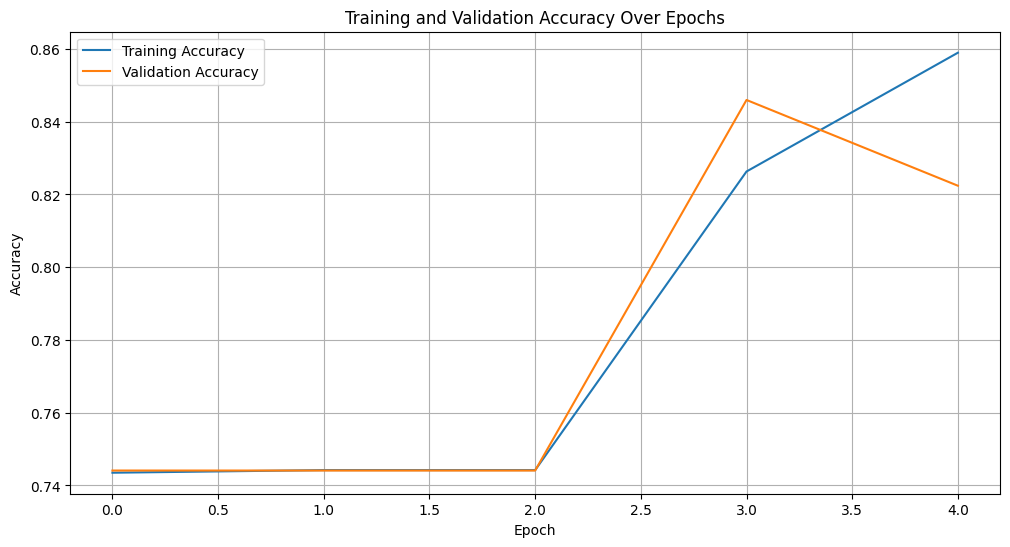

In [66]:

import matplotlib.pyplot as plt

# --- Visualize Training & Validation Accuracy ---
print("--- Plotting Training and Validation Accuracy ---")
plt.figure(figsize=(12, 6)) # Create a figure for the plots
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show() # Display the plot


---

**Conclusion:**
Traditional machine learning models (SVM, Logistic Regression, Naive Bayes) performed better than the LSTM on this tweet sentiment task, with SVM achieving the highest accuracy (\~88%). The LSTM scored slightly lower (\~84%), likely because tweets are short and simpler models handle them well. For this dataset, SVM is the best choice for accuracy and efficiency.
